## ER-диаграмма

Работу с новой базой данных лучше начать с изучения схемы (ER-диаграммы):

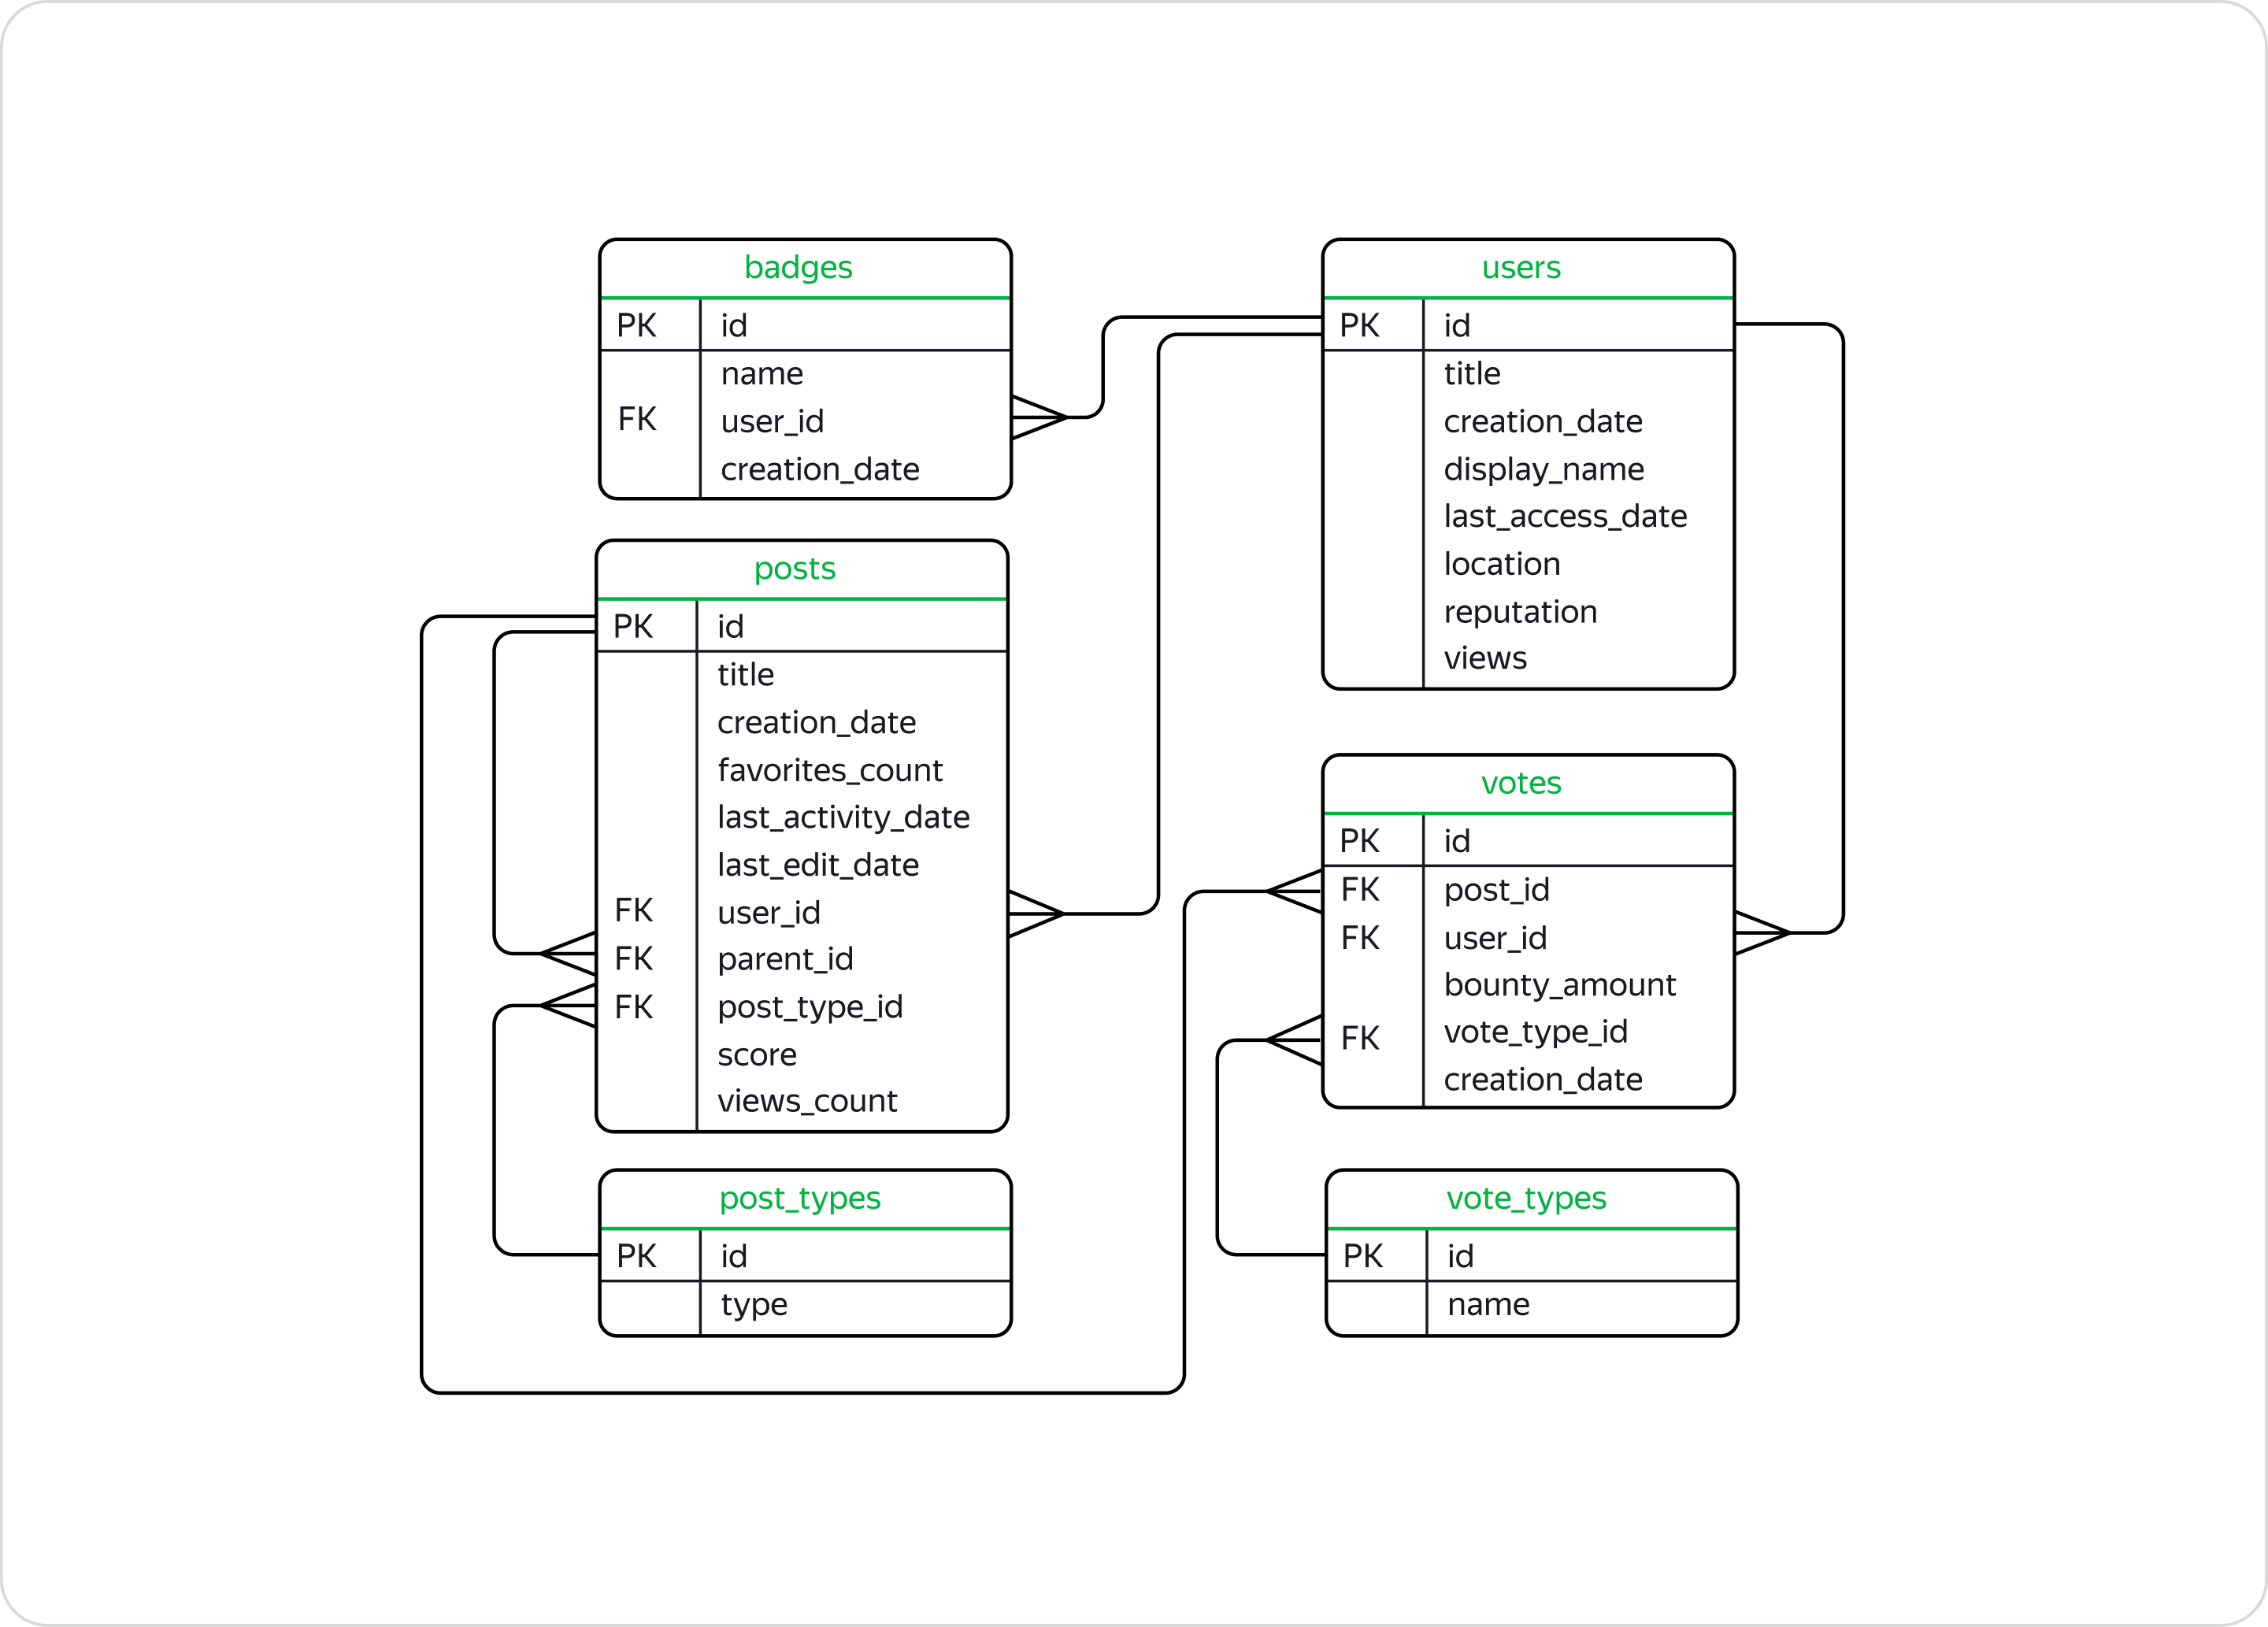

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
from sqlalchemy import create_engine 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)
import warnings; warnings.filterwarnings(action='once')

In [2]:
# данные для подключения к базе данных
db_config = {
    'user': '...', # имя пользователя
    'pwd': '...', # пароль
    'host': '...',
    'port': 1111, # порт подключения
    'db': '...' # название базы данных
}  

In [3]:
# строка для подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

engine = create_engine(connection_string) 

**Теперь можно познакомиться с данными, которые хранят таблицы.**

In [4]:
# запрос и вывод датафрейма
badges_query = '''
SELECT *
FROM stackoverflow.badges
'''
badges = pd.read_sql_query(badges_query, con = engine) 
badges.head()

,id,name,user_id,creation_date
0,82947,Teacher,994,2008-09-15 08:55:04
1,82949,Teacher,3893,2008-09-15 08:55:04
2,82950,Teacher,4591,2008-09-15 08:55:04
3,82951,Teacher,5196,2008-09-15 08:55:04
4,82952,Teacher,2635,2008-09-15 08:55:04


Таблица `badges` хранит информацию о значках, которые присуждаются за разные достижения. (например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок "postgresql") и включает такие поля:
* `id` - идентификатор значка, первичный ключ таблицы;
* `name`- название значка;
* `user_id`- идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице `users`;
* `creation_date` - дата присвоения значка.

In [5]:
# запрос и вывод датафрейма
post_types_query = '''
SELECT *
FROM stackoverflow.post_types
'''
post_types = pd.read_sql_query(post_types_query, con = engine) 
post_types.head()

,id,type
0,1,Question
1,2,Answer


Таблица `post_types` содержит информацию о типе постов и включает такие поля:
* `id` - идентификатор поста, первичный ключ таблицы;
* `type` - тип поста:
    - `Question` — пост с вопросом;
    - `Answer` — пост с ответом.

In [6]:
# запрос и вывод датафрейма
posts_query = '''
SELECT *
FROM stackoverflow.posts
'''
posts = pd.read_sql_query(posts_query, con = engine) 
posts.head()

,id,title,creation_date,favorites_count,last_activity_date,last_edit_date,user_id,parent_id,post_type_id,score,views_count
0,4,Convert Decimal to Double?,2008-07-31 21:42:53,41,2018-07-02 17:55:27.247,2018-07-02 17:55:27,8,0,1,573,37080
1,6,Percentage width child element in absolutely positioned parent on Internet Explorer 7,2008-07-31 22:08:09,10,2016-03-19 06:10:52.170,2016-03-19 06:05:48,9,0,1,256,16306
2,7,None,2008-07-31 22:17:58,0,2017-12-16 05:06:57.613,2017-12-16 05:06:58,9,4,2,401,0
3,9,How do I calculate someone's age in C#?,2008-07-31 23:41:00,399,2018-07-25 11:57:14.110,2018-04-21 17:48:14,1,0,1,1743,480476
4,11,Calculate relative time in C#,2008-07-31 23:55:38,529,2018-07-05 04:00:56.633,2017-06-04 15:51:20,1,0,1,1348,136033


Таблица `posts` содержит информацию о постах и включает такие поля:
* `id` - идентификатор поста, первичный ключ таблицы;
* `title` - заголовок поста;
* `creation_date` - дата создания поста;
* `favorites_count` - число, которое показывает, сколько раз пост добавили в «Закладки»;
* `last_activity_date` -  дата последнего действия в посте, например комментария;
* `last_edit_date` - дата последнего изменения поста;
* `user_id` - идентификатор пользователя, который создал пост, внешний ключ к таблице `users`;
* `parent_id` - если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом;
* `post_type_id` - идентификатор типа поста, внешний ключ к таблице `post_types`;
* `score` - количество очков, которое набрал пост;
* `views_count` - количество просмотров.

In [7]:
# запрос и вывод датафрейма
users_query = '''
SELECT *
FROM stackoverflow.users
'''
users = pd.read_sql_query(users_query, con = engine) 
users.head()

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700


Таблица `users` содержит информацию о пользователях и включает такие поля:
* `id` - идентификатор пользователя, первичный ключ таблицы;
* `creation_date` - дата регистрации пользователя;
* `display_name` - имя пользователя;
* `last_access_date` - дата последнего входа;
* `location` - местоположение;
* `reputation` - очки репутации, которые получают за хорошие вопросы и полезные ответы;
* `views` - число просмотров профиля пользователя.

In [8]:
# запрос и вывод датафрейма
vote_types_query = '''
SELECT *
FROM stackoverflow.vote_types
'''
vote_types = pd.read_sql_query(vote_types_query, con = engine) 
vote_types.head()

,id,name
0,1,AcceptedByOriginator
1,2,UpMod
2,3,DownMod
3,4,Offensive
4,5,Favorite


Таблица `vote_types` содержит информацию о типах голосов и включает такие поля:
* `id` - идентификатор типа голоса, первичный ключ;
* `name` - название метки:
    - `UpMod` — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными;
    - `DownMod` — такую отметку получают посты, которые показались пользователям наименее полезными;
    - `Close` — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы;
    - `Offensive` такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста;
    - `Spam` такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.

In [9]:
# запрос и вывод датафрейма
votes_query = '''
SELECT *
FROM stackoverflow.votes
'''
votes = pd.read_sql_query(votes_query, con = engine) 
votes.head()

,id,post_id,user_id,bounty_amount,vote_type_id,creation_date
0,434364,146794,4918,NaN,5,2008-10-03
1,434366,135535,16511,NaN,3,2008-10-03
2,434372,162181,12818,NaN,1,2008-10-03
3,434380,21965,4002,NaN,1,2008-10-03
4,434401,165975,8161,NaN,2,2008-10-03


Таблица `votes` содержит информацию о голосах за посты и включает такие поля:
* `id` - идентификатор голоса, первичный ключ;
* `post_id` - идентификатор поста, внешний ключ к таблице `posts`;
* `user_id` - идентификатор пользователя, который поставил посту голос, внешний ключ к таблице `users`;
* `bounty_amount` - сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту;
* `vote_type_id` - идентификатор типа голоса, внешний ключ к таблице `vote_types`;
* `creation_date` - дата назначения голоса.

## Выгрузки данных с помощью SQL-запросов и анализ результатов вывода.

Посмотрим как много вопросов набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

In [10]:
query = '''
SELECT DISTINCT COUNT(id)
FROM stackoverflow.posts
WHERE post_type_id = 1
AND (score > 300
OR favorites_count >= 100)
'''
pd.read_sql_query(query, con = engine) 

,count
0,1355


<div style="border:solid green 1px; padding: 10px">
Из 243796 постов, всего 1355 соответствуют указанным параметрам.

Возьмем период с 1 по 18 ноября 2008 года включительно и посмотрим сколько в среднем в день задавали вопросов (округлим результат до целого).

In [11]:
query = '''
SELECT ROUND(AVG(sum_qstn)) AS avg_qstn_day
FROM (
    SELECT creation_date::date AS dt,
           COUNT(id) AS sum_qstn
    FROM stackoverflow.posts
    WHERE post_type_id = 1
    AND creation_date::date BETWEEN '2008-11-01' AND '2008-11-18'
    GROUP BY creation_date::date) AS sum_questions
'''
pd.read_sql_query(query, con = engine) 

,avg_qstn_day
0,383.0


<div style="border:solid green 1px; padding: 10px">
За первую половину ноября пользователи в среднем задали 383 вопроса в день.

Интересно, а есть ли такие пользователи, которые  получили значки сразу в день регистрации?

In [12]:
query = '''
SELECT COUNT(DISTINCT user_id)
FROM stackoverflow.badges AS b
JOIN stackoverflow.users AS u ON b.user_id=u.id
WHERE b.creation_date::date=u.creation_date::date
'''
pd.read_sql_query(query, con = engine) 

,count
0,7047


<div style="border:solid green 1px; padding: 10px">
Действительно уникальны те пользователи, которые только зарегистрировались и уже получили значки, и таких аж 7047 человек!

Есть некий "Joel Coehoorn", посмотрим как обстоят дела у его постов, получали ли они хотя бы один голос?

In [13]:
query = '''
SELECT COUNT(DISTINCT p.id)
FROM stackoverflow.posts AS p
JOIN stackoverflow.votes AS v ON p.id=v.post_id
WHERE p.user_id = (
    SELECT id
    FROM stackoverflow.users
    WHERE display_name = 'Joel Coehoorn')
'''
pd.read_sql_query(query, con = engine) 

,count
0,12


<div style="border:solid green 1px; padding: 10px">
12 постов Джоела отмечены голосами.

Возьмем таблицу `vote_types` и поэксперементируем с нумерацией записей, как красивее: по возрастанию или по убыванию?🤔

In [14]:
query = '''
SELECT *,
        ROW_NUMBER() OVER(ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY id
'''
pd.read_sql_query(query, con = engine) 

,id,name,rank
0,1,AcceptedByOriginator,15
1,2,UpMod,14
2,3,DownMod,13
3,4,Offensive,12
4,5,Favorite,11
5,6,Close,10
6,7,Reopen,9
7,8,BountyStart,8
8,9,BountyClose,7
9,10,Deletion,6


<div style="border:solid green 1px; padding: 10px">
Выглядит красиво 😎, но классическая сортировка от меньшего к большему, все же, привычнее.🤭

Выведем Топ-10  опытных пользователей сервиса, которые разбираются в том, какие вопросы требуют доработки или не подходят для платформы (отмечаются метками типа `Close`).

Отсортируем данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя и соберем в таблицу из двух полей:
- идентификатором пользователя;
- количеством голосов.

In [15]:
query = '''
SELECT user_id,
       COUNT(v.id) AS cnt_v
FROM stackoverflow.votes AS v
JOIN stackoverflow.vote_types AS vt ON vt.id=v.vote_type_id
WHERE vt.name = 'Close'
GROUP BY user_id
ORDER BY cnt_v DESC, user_id DESC
LIMIT 10
'''
pd.read_sql_query(query, con = engine) 

,user_id,cnt_v
0,20646,36
1,14728,36
2,27163,29
3,41158,24
4,24820,23
5,9345,23
6,3241,23
7,44330,20
8,38426,19
9,19074,19


<div style="border:solid green 1px; padding: 10px">
Топ-10 опытных пользователей сервиса готов и за первое место по количеству меток борятся двое, поставививших по 36 штук каждый.

Теперь выведем Топ-10 самых "значканутых" пользователей сервиса за период с 15.11.2008 по 15.12.2008, что может также показать активность на сервисе.

Пользователям, которые набрали одинаковое количество значков, присвоим одно и то же место в рейтинге.
Записи отсортируем по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя и соберем таблицу из несколькольких полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг.

In [16]:
query = '''
SELECT user_id,
       COUNT(id) AS cnt_b,
       DENSE_RANK() OVER(ORDER BY COUNT(id) DESC)
FROM stackoverflow.badges      
WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY user_id
ORDER BY cnt_b DESC, user_id
LIMIT 10
'''
pd.read_sql_query(query, con = engine) 

,user_id,cnt_b,dense_rank
0,22656,149,1
1,34509,45,2
2,1288,40,3
3,5190,31,4
4,13913,30,5
5,893,28,6
6,10661,28,6
7,33213,25,7
8,12950,23,8
9,25222,20,9


<div style="border:solid green 1px; padding: 10px">
Топ-10 самых "значканутых" пользователей готов и 149 значков - это самое большое значение в заданном периоде 💪.

Посмотрим сколько в среднем очков получает пост каждого пользователя. Посты без заголовков, а также те, что набрали ноль очков, учитывать не будем. Выведем:

* заголовок поста;
* идентификатор пользователя;
* число очков поста;
* среднее число очков пользователя за пост, округлённое до целого числа.

In [17]:
query = '''
SELECT title,
       user_id,
       score,
       ROUND(AVG(score) OVER(PARTITION BY user_id)) AS avg_score
FROM stackoverflow.posts
WHERE title IS NOT NULL
AND score != 0       
'''
pd.read_sql_query(query, con = engine)

,title,user_id,score,avg_score
0,Diagnosing Deadlocks in SQL Server 2005,1,82,573.0
1,How do I calculate someone's age in C#?,1,1743,573.0
2,Why doesn't IE7 copy <pre><code> blocks to the clipboard correctly?,1,37,573.0
3,Calculate relative time in C#,1,1348,573.0
4,Wrapping StopWatch timing with a delegate or lambda?,1,92,573.0
...,...,...,...,...
47349,Multi-lingual projects in Visual Studio,3742716,1,1.0
47350,Change datatype when importing Excel file into Access,3930756,5,5.0
47351,How to host a Silverlight app in a Sharepoint 2007 Web Part,4020932,8,8.0
47352,Getting counts for a paged SQL search stored procedure,5696608,2,2.0


<div style="border:solid green 1px; padding: 10px">
Среднее количество очков за пост пользователя варьируется от 2 до 573.

Посмотрим о чем посты набирающие много очков, скажем те, у которых больше 1000 значков. Посты без заголовков в список включать не будем.

In [18]:
query = '''
SELECT title
FROM stackoverflow.posts
WHERE user_id = (
    SELECT user_id
    FROM stackoverflow.badges
    GROUP BY user_id
    HAVING COUNT(id) > 1000)
AND title IS NOT NULL          
'''
pd.read_sql_query(query, con = engine) 

,title
0,What are the correct version numbers for C#?
1,What's the strangest corner case you've seen in C# or .NET?
2,What's the hardest or most misunderstood aspect of LINQ?
3,Project management to go with GitHub


<div style="border:solid green 1px; padding: 10px">
Всего 4 поста принадлежат пользователям с более чем 1000 значков. И посвещены они C#, .NET, LINQ, GitHub.

Разобьем  пользователей из США (англ. `United States`) на три группы в зависимости от количества просмотров их профилей (возьмем тех, у которых был минимум 1 просмотр):
* пользователям с числом просмотров больше либо равным 350 присвойте группу `1`;
* пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу `2`;
* пользователям с числом просмотров меньше 100 — группу `3`.

In [19]:
query = '''
SELECT id,
       views,
       CASE
           WHEN views >= 350 THEN 1
           WHEN views >= 100 AND views < 350 THEN 2
           ELSE 3
       END AS group_users
FROM stackoverflow.users
WHERE location LIKE '%%United States%%'
AND views > 0
GROUP BY id, views      
'''
pd.read_sql_query(query, con = engine) 

,id,views,group_users
0,26540,65,3
1,20710,66,3
2,2494,903,1
3,28987,97,3
4,8954,5027,1
...,...,...,...
2359,9128,1532,1
2360,5557,80,3
2361,958,165,2
2362,18356,341,2


Посмотрим как распределились пользователи.

In [20]:
query = '''
SELECT COUNT(id),
       group_users
FROM (
    SELECT id,
           views,
           CASE
               WHEN views >= 350 THEN 1
               WHEN views >= 100 AND views < 350 THEN 2
               ELSE 3
           END AS group_users
    FROM stackoverflow.users
    WHERE location LIKE '%%United States%%'
    AND views > 0
    GROUP BY id, views) AS q
GROUP BY group_users
'''
pd.read_sql_query(query, con = engine)

,count,group_users
0,775,3
1,785,2
2,804,1


Дополним предыдущий запрос:

Выведем лидеров каждой группы (пользователей, которые набрали максимальное число просмотров в своей группе):
- идентификатор пользователя,
- группу,
- количеством просмотров.

 Отсортирем таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

In [21]:
query = '''
WITH
grouped_users AS (
    SELECT id,
           views,
           CASE
               WHEN views >= 350 THEN 1
               WHEN views >= 100 AND views < 350 THEN 2
               ELSE 3
           END AS group_users
    FROM stackoverflow.users
    WHERE location LIKE '%%United States%%'
    AND views > 0
    GROUP BY id, views
    ORDER BY views DESC, group_users
),
max_in_groups AS (
SELECT DISTINCT FIRST_VALUE(views) OVER(PARTITION BY group_users) AS max_g
FROM grouped_users)

SELECT DISTINCT id,
       group_users,
       views
FROM grouped_users AS g
JOIN max_in_groups AS m ON m.max_g = g.views
WHERE m.max_g = g.views
ORDER BY views DESC, id  
'''
pd.read_sql_query(query, con = engine) 

,id,group_users,views
0,16587,1,62813
1,9094,2,349
2,9585,2,349
3,15079,2,349
4,33437,2,349
5,3469,3,99
6,4829,3,99
7,19006,3,99
8,22732,3,99
9,403434,3,99


<div style="border:solid green 1px; padding: 10px">
Распределились пользователи из США довольно равномерно:
    
- пользователей с числом просмотров больше либо равным 350 (группа `1`) чуть больше остальных - 804 человека, и лидер этой группы набрал 62813 просмотров;
- на втором месте пользователи с числом просмотров меньше 350, но больше либо равно 100 (группа `2`) - 785 человек, и лидеров здесь 5, их профили набрали одинаковое количество просмотров (349);
- пользователи группы `3` с числом просмотров меньше 100 — 775 человек, и здеть также 5 лидеров по 99 просмотров у каждого.

Расчитаем ежедневный прирост новых пользователей в ноябре 2008 года.
Выведем:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

In [22]:
query = '''
SELECT DISTINCT EXTRACT(DAY FROM creation_date::date) AS day_reg,
       COUNT(id) OVER(PARTITION BY EXTRACT(DAY FROM creation_date::date)) AS cnt_users,
       COUNT(id) OVER(ORDER BY EXTRACT(DAY FROM creation_date::date)) AS cnt_users_per_day
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'  
'''
pd.read_sql_query(query, con = engine) 

,day_reg,cnt_users,cnt_users_per_day
0,1.0,34,34
1,2.0,48,82
2,3.0,75,157
3,4.0,192,349
4,5.0,122,471
5,6.0,132,603
6,7.0,104,707
7,8.0,42,749
8,9.0,45,794
9,10.0,93,887


<div style="border:solid green 1px; padding: 10px">
    
2400 пользователей за месяц. Неплохо.

Для каждого пользователя, который написал хотя бы один пост, найдем интервал между регистрацией и временем создания первого поста.

Выведем:
* идентификатор пользователя;
* разницу во времени между регистрацией и первым постом.

In [23]:
query = '''
WITH
post_dt AS (
SELECT DISTINCT user_id,
       MIN(creation_date) OVER(PARTITION BY user_id) AS min_post_dt
FROM stackoverflow.posts),
users AS (
SELECT id,
       creation_date
FROM stackoverflow.users
)

SELECT id,
       min_post_dt - creation_date AS diff
FROM users
JOIN post_dt ON post_dt.user_id=users.id
'''
pd.read_sql_query(query, con = engine) 

,id,diff
0,1,0 days 09:18:29
1,2,0 days 14:37:03
2,3,3 days 16:17:09
3,4,15 days 05:44:22
4,5,1 days 14:57:51
...,...,...
18844,3644960,0 days 00:00:00
18845,3742716,66 days 21:15:48
18846,3930756,8 days 02:11:55
18847,4020932,47 days 18:30:34


Есть "странные" значения в 0 дней или даже отрицательные дни. Немного изменим вывод запроса, дополним его датой регистрации и  датой создания первого поста:

In [24]:
query = '''
WITH
post_dt AS (
SELECT DISTINCT user_id,
       MIN(creation_date) OVER(PARTITION BY user_id) AS min_post_dt
FROM stackoverflow.posts),
users AS (
SELECT id,
       creation_date
FROM stackoverflow.users
)

SELECT id,
       min_post_dt - u.creation_date AS diff,
       min_post_dt,
       creation_date as dt
FROM users as u
JOIN post_dt ON post_dt.user_id=u.id
ORDER BY diff
'''
pd.read_sql_query(query, con = engine)

,id,diff,min_post_dt,dt
0,352728,-620 days +03:27:30,2008-09-15 12:33:47,2010-05-28 09:06:17
1,39040,-90 days +23:25:50,2008-08-22 17:19:24,2008-11-19 17:53:34
2,20207,-47 days +21:37:24,2008-08-07 02:50:13,2008-09-22 05:12:49
3,146270,-46 days +22:23:07,2008-08-01 15:27:23,2008-09-15 17:04:16
4,32538,-43 days +23:06:54,2008-09-17 18:49:30,2008-10-29 19:42:36
...,...,...,...,...
18844,273,120 days 23:35:43,2008-12-03 10:12:29,2008-08-04 10:36:46
18845,1225,124 days 04:33:24,2008-12-15 18:28:04,2008-08-13 13:54:40
18846,774,126 days 09:49:04,2008-12-13 04:34:18,2008-08-08 18:45:14
18847,1626,134 days 06:37:36,2008-12-29 23:08:19,2008-08-17 16:30:43


<div style="border:solid green 1px; padding: 10px">
    
Теперь стало видно, что есть пользователи, посты которых датированы раньше, чем их регистрация на сервисе. Логично предположить, что есть ошибки в данных.
    
Также есть такие пользователи, которые написали свой первый запрос в тоже время, в которое зарегистрировались, с точностью до секунды и это выглядит странно.

Посмотрим сколько просмотров постов было в каждом месяце 2008 года. Попадут только те месяцы, за которые есть данные в базе, отсортируем вывод запроса по убыванию общего количества просмотров.

In [25]:
query = '''
SELECT DISTINCT DATE_TRUNC('month', creation_date)::date,
       SUM(views_count) OVER(PARTITION BY DATE_TRUNC('month', creation_date)::date) AS cnt
FROM stackoverflow.posts
WHERE EXTRACT (YEAR FROM creation_date::date) = 2008
ORDER BY cnt DESC
'''
pd.read_sql_query(query, con = engine) 

,date_trunc,cnt
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


<div style="border:solid green 1px; padding: 10px">
    
Высокая активность в сентябре и октябре может быть вызвана началом учебного года, а низкая июльская активность может быть вызвана, к примеру, неполнотой данных в базе.

Посмотрим на имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов (вопросы учитывать не будем). Результат отсортируем по полю с именами в лексикографическом порядке.

Т.к. одному имени может соответствовать несколько значений `user_id`,  выведем количество уникальных значений этого поля.

In [26]:
query = '''
SELECT u.display_name,
       COUNT(DISTINCT user_id)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
JOIN stackoverflow.users u ON u.id = p.user_id
WHERE DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
  AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
  AND pt.type = 'Answer'
GROUP BY u.display_name
HAVING COUNT(*) > 100
ORDER BY display_name
'''
pd.read_sql_query(query, con = engine) 

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


<div style="border:solid green 1px; padding: 10px">
    
Возможно не стоит анализировать данные по имени, к примеру имени `Alan` соответствует целых 8 `user_id`. В данных можно найти более уникальные параметры.

Мы смотрели сколько просмотров постов было в каждом месяце, теперь посчитаем сами посты за 2008 год, также по месяцам. Возьмем посты тех пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года.

In [27]:
query = '''
SELECT COUNT(p.id),
       DATE_TRUNC('month', p.creation_date)::date AS month
FROM stackoverflow.posts AS p
JOIN (
    SELECT DISTINCT id
    FROM stackoverflow.users
    WHERE EXTRACT(YEAR FROM creation_date::date) = 2008
    AND EXTRACT(MONTH FROM creation_date::date) = 9
) AS sept_u ON p.user_id=sept_u.id
WHERE EXTRACT(YEAR FROM p.creation_date::date) = 2008
AND sept_u.id IN(
SELECT DISTINCT user_id
FROM stackoverflow.posts AS p
WHERE DATE_TRUNC('month', p.creation_date)::date ='2008-12-01'
)
GROUP BY month
ORDER BY month DESC
'''
pd.read_sql_query(query, con = engine) 

,count,month
0,17641,2008-12-01
1,18294,2008-11-01
2,27171,2008-10-01
3,24870,2008-09-01
4,32,2008-08-01


<div style="border:solid green 1px; padding: 10px">
Чуть ранее мы выснили, что возможно в базу попали ошибочные данные или был какой-то сбой при внесении/записи данных в базу. Следовательно и в этом выводе также есть значения, которые можно считать анамальными: в августе активны пользователи, которые зарегистрировались только в сентябре.

Выведем для каждого пользвателя несколько полей:

* идентификатор пользователя, который написал пост;
* дата создания поста;
* количество просмотров у текущего поста;
* сумму просмотров постов автора с накоплением.

Итоговую таблицу отсортируем по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста, также не будем учитывать посты без просмотров.

In [35]:
query = '''
SELECT DISTINCT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER(PARTITION BY user_id  ORDER BY creation_date) AS sum_views_by_usr
FROM stackoverflow.posts
WHERE views_count > 0
ORDER BY user_id, creation_date
'''
pd.read_sql_query(query, con = engine).head(35)

,user_id,creation_date,views_count,sum_views_by_usr
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-08-12 04:59:35,72431,688940
3,1,2008-08-21 14:18:42,27533,716473
4,1,2008-09-25 21:58:05,6507,722980
5,1,2008-10-24 08:39:47,14969,737949
6,1,2008-11-26 04:15:42,5505,743454
7,1,2008-12-03 16:16:43,296436,1039890
8,2,2008-08-01 04:59:34,79087,79087
9,2,2008-08-01 05:09:56,65443,144530


Дополним запрос, выведем ТОП-10 пользователей по сумме просмотров постов автора с накоплением.

In [29]:
query = '''
SELECT MAX(sum_views_by_usr) as max_sum_views_by_usr,
       user_id
FROM (       
SELECT DISTINCT user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER(PARTITION BY user_id  ORDER BY creation_date) AS sum_views_by_usr
FROM stackoverflow.posts
WHERE views_count > 0
ORDER BY user_id, creation_date) as q
GROUP BY user_id
ORDER BY max_sum_views_by_usr DESC
LIMIT 10
'''
pd.read_sql_query(query, con = engine)

,max_sum_views_by_usr,user_id
0,10496836,4872
1,9293464,4883
2,5160545,17693
3,5142011,6068
4,5062506,730
5,4769221,15055
6,4688889,1384652
7,4302578,116
8,4276165,2138
9,4165633,9021


<div style="border:solid green 1px; padding: 10px">

Больше всего просмотров с накомплением у пользователя 4872 - 10496836 просмотров, а десятое место за пользователем 9021 - 4165633 просмотра.


Возьмем период с 1 по 7 декабря 2008 года включительно и посмотрим сколько в среднем дней пользователи взаимодействовали с платформой. Для каждого пользователя отберем дни, в которые он или она опубликовали хотя бы один пост.

In [30]:
query = '''
SELECT ROUND(AVG(cnt_actv_dt))
FROM (
    SELECT user_id,
           COUNT(p_cnt_dt) AS cnt_actv_dt
FROM (
    SELECT user_id,
           CAST(creation_date as date) AS p_cnt_dt
    FROM stackoverflow.posts
    WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
    GROUP BY user_id, p_cnt_dt) q
GROUP BY user_id) qq   
'''
pd.read_sql_query(query, con = engine) 

,round
0,2.0


<div style="border:solid green 1px; padding: 10px">

За первые семь дней декабря 2008 года в среднем два дня пользователи взаимодействовали с платформой.

Посмотрим на сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года.
Выведем:
- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

In [31]:
plt_query = '''
SELECT dt,
       cnt_id,
       ROUND(((((100 * cnt_id )/ LAG(cnt_id) OVER()::numeric))-100), 2) AS prsnt
FROM (
SELECT EXTRACT(MONTH FROM creation_date::date) AS dt,
       COUNT(id) AS cnt_id
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY dt) q
'''
pd.read_sql_query(plt_query, con = engine) 

,dt,cnt_id,prsnt
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Значение процента отрицательное в случа, если постов стало меньше, а если больше — значение должно быть положительное, за наш период такого нет.😟

Построим график для визуализации результата запроса:

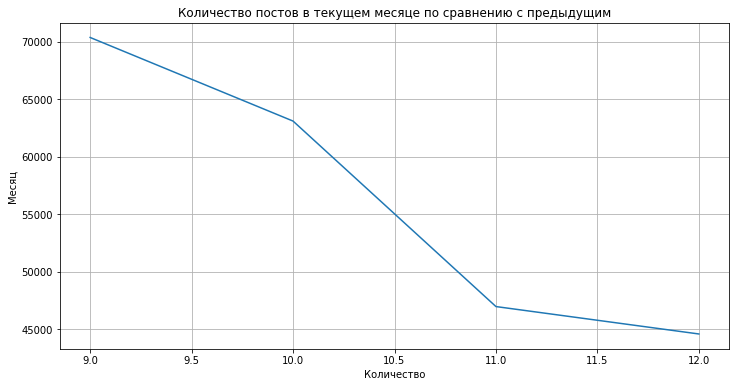

In [32]:
plt.figure(figsize=(12, 6))
plt. grid()
df = pd.read_sql_query(plt_query, con = engine)
ax = sns.lineplot(data=df, x='dt', y='cnt_id')
ax.set_title('Количество постов в текущем месяце по сравнению с предыдущим')
ax.set_xlabel('Количество') 
ax.set_ylabel('Месяц');

Посчитаем процент, который показывает, насколько изменилось количество постов в декабре по сравнению с сентябрем:

In [33]:
((100 * df['cnt_id'][3]) / df['cnt_id'][0]) - 100

-36.6329880206335

<div style="border:solid green 1px; padding: 10px">

Наглядно видно, что количество постов довольно сильно снижается с сентября по декабрь:
- на ~10% в октябре по сравнению с сентябрем,
- на ~25.5% в ноябре по сравнению с октябрем,
- на ~5% в декабре по сравнению с ноябрем.
    
Таким образом показатель количества постов в декабре чуть больше чем на ~36% ниже чем показатель сентября.

Выведем данные активности пользователя, который опубликовал больше всего постов за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

In [34]:
query = '''
SELECT DISTINCT week_num,
       FIRST_VALUE(dt) OVER(PARTITION BY week_num) AS last_post_dt
FROM (       
    SELECT EXTRACT(WEEK FROM creation_date::date)AS week_num,
           creation_date AS dt
    FROM stackoverflow.posts
    WHERE creation_date::date BETWEEN '2008-10-01' AND '2008-10-31'
    AND user_id = (
                SELECT user_id
                FROM (SELECT user_id,
                       COUNT(id) AS cnt_posts
                      FROM stackoverflow.posts
                      GROUP BY user_id
                      ORDER BY cnt_posts DESC
                      LIMIT 1) q)
    ORDER BY week_num, dt DESC) qq
ORDER BY week_num
'''
pd.read_sql_query(query, con = engine) 

,week_num,last_post_dt
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


<div style="border:solid green 1px; padding: 10px">

Вот и он - самый активный пользователь, и его последние посты понедельно за октябрь. 💪

 ## Вывод

<div style="border:solid green 2px; padding: 20px">

В нашем распоряжении были данные из базы StackOverflow за 2008 год о: постах и их типах, пользователях, значках, которые присуждаются за разные достижения, голосах и их типах.
    
Мы написали ряд SQL-запросов и проанализивали результаты от их выгрузки:
    
- Из 243796 постов, всего 1355 вопросов набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки»;
- За первую половину ноября пользователи в среднем задали 383 вопроса в день;
- 7047 человек получили значки сразу в день регистрации;
- 36 голосов с метками типа `Close` от опытных пользователей сервиса, которые разбираются в том, какие вопросы требуют доработки или не подходят для платформы - это максимальное количество для доступного нам периода данных;
- 149 значков - это самое большое значение для пользователей сервиса в заданном периоде  с 15.11.2008 по 15.12.2008;
- Среднее количество очков за пост пользователя варьируется от 2 до 573;
- Всего 4 поста принадлежат пользователям с более чем 1000 значками. И посвещены они C#, .NET, LINQ, GitHub;
- Распределение пользователей из США:
    * пользователей с числом просмотров больше либо равным 350 (группа 1) чуть больше остальных - 804 человека, и лидер этой группы набрал 62813 просмотров;
    * на втором месте пользователи с числом просмотров меньше 350, но больше либо равно 100 (группа 2) - 785 человек, и лидеров здесь 5, их профили набрали одинаковое количество просмотров (349);
    * пользователи группы 3 с числом просмотров меньше 100 — 775 человек, и здеть также 5 лидеров по 99 просмотров у каждого;
- В ноябре ежедневный прирост новых пользователей составил 2400 человек;
- Высокая активность в сентябре и октябре (что может быть вызвано началом учебного года) и низкая июльская активность (возможно вызвана, к примеру, неполнотой данных в базе);
- Больше всего просмотров с накомплением у пользователя 4872 - 10496836 просмотров, а десятое место за пользователем 9021 - 4165633 просмотра;
- За первые семь дней декабря 2008 года в среднем два дня пользователи взаимодействовали с платформой;
- Количество постов довольно сильно снижается с сентября по декабрь:
    * на ~10% в октябре по сравнению с сентябрем,
    * на ~25.5% в ноябре по сравнению с октябрем,
    * на ~5% в декабре по сравнению с ноябрем.

Таким образом показатель количества постов в декабре ~ на 36% ниже чем показатель сентября. 
    
Также в данных выявлены аномалии: есть пользователи, посты которых датированы раньше, чем их регистрация на сервисе. Логично предположить, что есть ошибки в данных. Также есть такие пользователи, которые написали свой первый запрос в тоже время, в которое зарегистрировались, с точностью до секунды и это выглядит странно. Если бы данные были без ошибок, возможно вся картина была бы иной.